In [1]:
### Imports and Auxiliary Functions

import numpy as np
import matplotlib.pyplot as plt

def cofactor(A, m, n): # Function to find and return the cofactor matrix of a matrix
    shape = np.shape(A)
    newshape = (shape[0]-1, shape[1]-1) # Since we will exclude one row and one column
    B = []
    for i in range(shape[0]):
        for j in range(shape[1]):
            if(i != m and j != n):
                B.append(A[i][j]) # Linearly accumulate new elements
    return np.reshape(B, newshape) # Reshape to form new matrix

def determinant(A): # Function to calculate the determinants
    shape = np.shape(A)
    result = 0.
    if(shape[0] == 2):
        result = A[0][0] * A[1][1] - A[1][0] * A[0][1]
    else:
        for j in range(shape[1]):
            term = 1.
            term *= ((-1.)**j)*A[0][j]
            cofactor_matrix = cofactor(A, 0, j)
            term *= determinant(cofactor_matrix) # Recursive calculation
            result += term
    return result

def traditional_matrix_inverse(A):
    delta = determinant(A)
    shape = np.shape(A)
    adj = np.zeros_like(A)
    for i in range(shape[0]):
        for j in range(shape[1]):
            adj[i][j] = (-1.)**(i + j) * determinant(cofactor(A, i, j))
    adj = adj.T
    inv = np.power(delta, -1) * adj
    return inv

In [2]:
### Least Square Regression - Polynomial Regression - Main Function

def LSR(x, y, sigma, degree, retchi=True):
    n = np.size(x)
    m = degree
    A = np.divide( np.power( np.reshape( np.repeat( x, m+1, axis=0 ), ( n, -1 ) ), np.arange( m + 1 ) ), np.reshape( np.repeat( sigma, m+1, axis=0 ), ( n, -1 ) ) )
    A_trans = np.transpose(A)
    C = traditional_matrix_inverse(np.matmul(A_trans, A))
    a = np.matmul(np.matmul(C, A_trans), y / sigma)
    errors = np.sqrt( np.array([C[i, i] for i in range(m + 1)]) )
    if(retchi==True):
        delta = np.sum( a * ( np.power( np.reshape( np.repeat( x, m+1, axis=0 ), ( n, -1 ) ), np.arange( m + 1 ) ) ), axis=1 ) - y
        chi_sq = np.sum( ( delta / sigma ) ** 2 )
        return(a, errors, chi_sq)
    else:
        return(a, errors)

In [ ]:
### Get the data and Fit a Polynomial (quadratic) Function

x, y, error = np.loadtxt('data2.txt', unpack=True)
a, errors, chi_sq = LSR(x, y, error, 10, True)

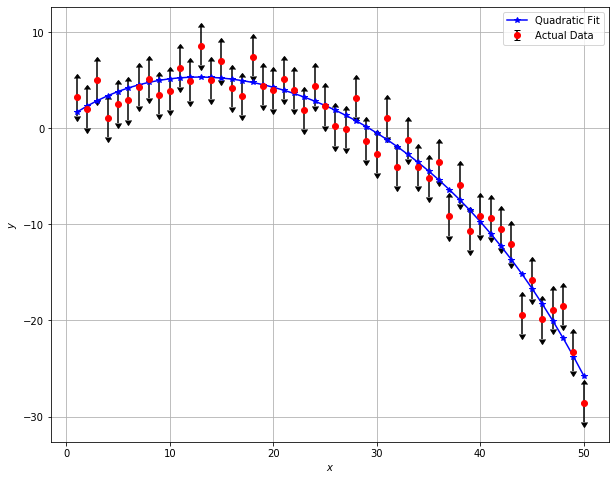

In [9]:
### Plotting

fig = plt.figure()
fig.set_size_inches(10,8)
plt.errorbar(x, y, yerr=error, fmt='ro' ,ecolor='k', lolims=True, uplims=True, label='Actual Data')
plt.plot(x, np.sum( a * ( np.power( np.reshape( np.repeat( x, np.size(a) , axis=0 ), ( np.size(x), -1 ) ), np.arange( np.size(a) ) ) ), axis=1 ) , 'b*-', label='Quadratic Fit')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [10]:
print('The Linear Fit is: ' + str(a[0]) + ' + (' + str(a[1]) + ') * x' + ' + (' + str(a[2]) + ') * x^2')
print('The errors in (a1, a2, a3) are: ' + str(errors))
print('The Chi-squared value of this fit is: ' + str(chi_sq))
print('The Reduced Chi-squared value of this fit is: ' + str(chi_sq / (np.size(x) - np.size(a)) ))

The Linear Fit is: 0.9447628559861034 + (0.7590130637251566) * x + (-0.03950384599943642) * x^2
The errors in (a1, a2, a3) are: [1.60235495e+00 4.26148079e-01 3.35080003e-02 9.82569814e-04
 9.56084352e-06]
The Chi-squared value of this fit is: 37.51476191433619
The Reduced Chi-squared value of this fit is: 0.8336613758741376
